# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score

# Reading the dataset and data analysis

In [2]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.children.max()

5

In [4]:
data.shape

(1338, 7)

In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(1337, 7)

In [11]:
data.reset_index(inplace=True)

In [12]:
data

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830
1333,1334,18,female,31.920,0,no,northeast,2205.98080
1334,1335,18,female,36.850,0,no,southeast,1629.83350
1335,1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
data.drop(columns=['index'], inplace=True)

In [14]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


# Data Visualization 

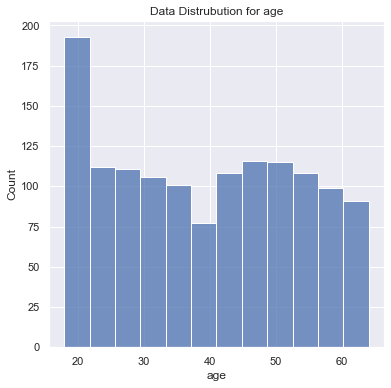

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(data['age'])
plt.title('Data Distrubution for age')
plt.show()

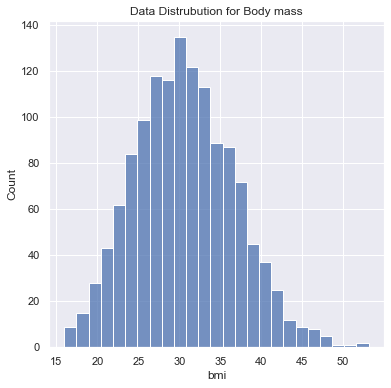

In [18]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(data['bmi'])
plt.title('Data Distrubution for Body mass')
plt.show()

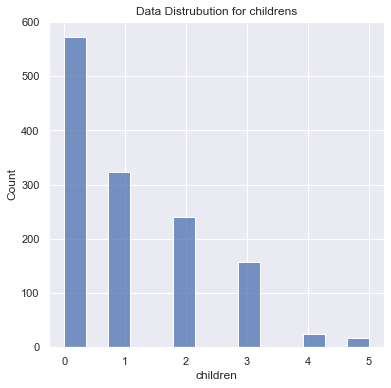

In [19]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(data['children'])
plt.title('Data Distrubution for childrens')
plt.show()

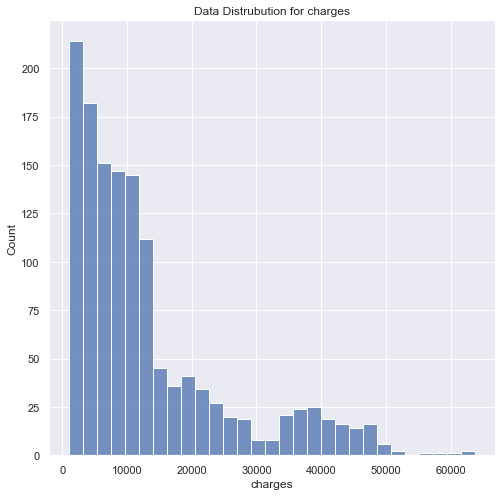

In [20]:
sns.set()
plt.figure(figsize=(8,8))
sns.histplot(data['charges'])
plt.title('Data Distrubution for charges')
plt.show()

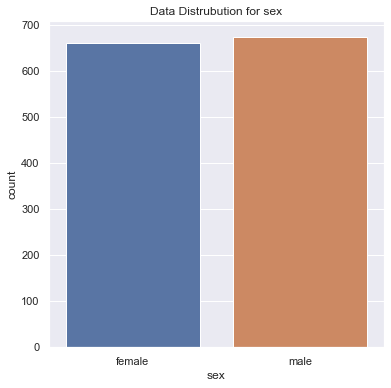

In [21]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data.sex,data=data)
plt.title('Data Distrubution for sex')
plt.show()

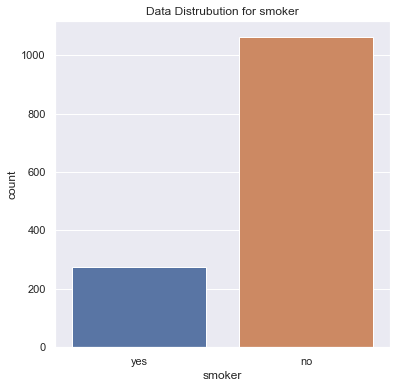

In [22]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data.smoker,data=data)
plt.title('Data Distrubution for smoker')
plt.show()

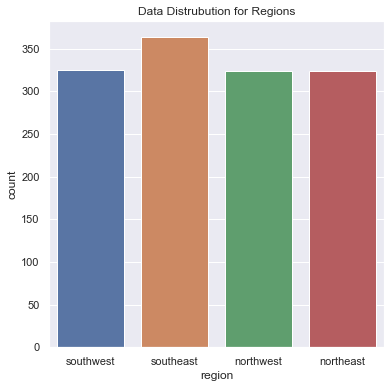

In [23]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data.region,data=data)
plt.title('Data Distrubution for Regions')
plt.show()

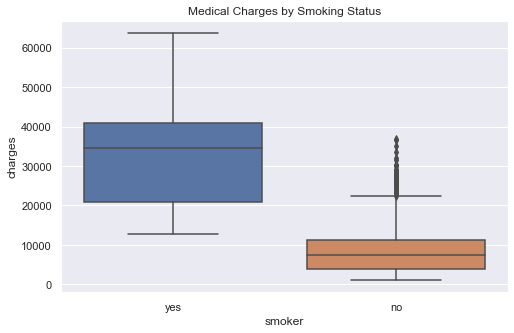

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title("Medical Charges by Smoking Status")
plt.show()

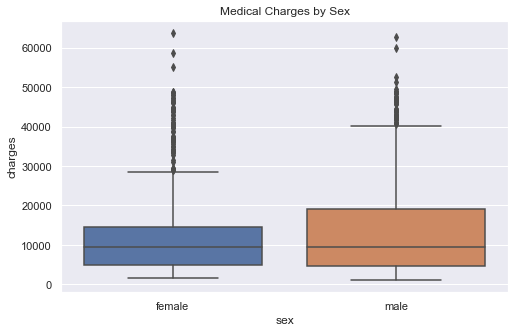

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='charges', data=data)
plt.title("Medical Charges by Sex")
plt.show()

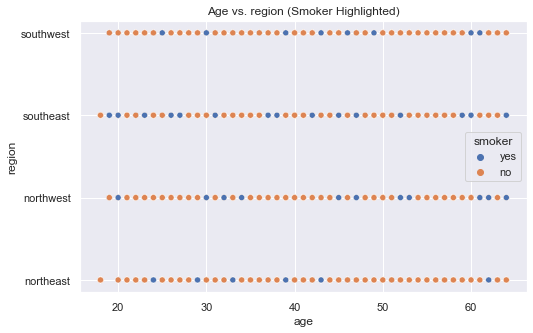

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='region', hue='smoker', data=data)
plt.title("Age vs. region (Smoker Highlighted)")
plt.show()


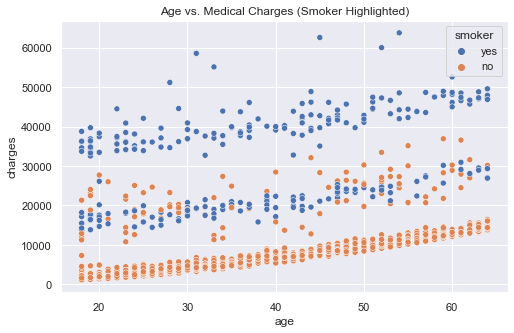

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=data)
plt.title("Age vs. Medical Charges (Smoker Highlighted)")
plt.show()


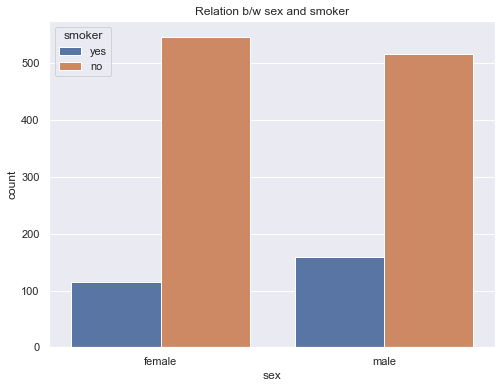

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex', hue='smoker', data=data)
plt.title("Relation b/w sex and smoker")
plt.show()


# Converting Categorical into Numerical Data

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [30]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [31]:
data.sex.replace(['female', 'male'],[0,1],inplace=True)

In [32]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [33]:
data.smoker.replace(['yes', 'no'],[1,0],inplace=True)

In [34]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [35]:
data.region.replace(['southeast', 'southwest', 'northeast', 'northwest'],[0,1,2,3],inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


In [37]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


# Model Creation

In [38]:
input_data=data.drop(columns=['charges'])
output_data=data['charges']

In [39]:
input_data.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [40]:
output_data.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [41]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [42]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1069, 6), (268, 6), (1069,), (268,))

In [43]:
model=RandomForestRegressor(n_estimators=100,max_depth=7)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=7)

In [44]:
y_pred=model.predict(x_test)

In [45]:
y_pred

array([ 9847.31632265,  7385.79056757, 12317.82776648, 42648.65613147,
        5316.66342743,  9724.53391785, 38716.84279038,  2356.32397046,
        8816.14321305, 10908.99342829, 14387.87012286, 23537.02918304,
       42892.37762555, 14432.57901873,  6864.90280542,  9402.31285686,
        5736.04985802, 40000.10133122,  5053.66785901,  4733.03560211,
        4479.29986254, 20188.08198686, 10025.52673765, 20431.50817318,
       39601.13862806, 13963.90300129, 42144.69826017, 45943.43609492,
       10633.41499299, 12038.32132323,  4456.87095095,  9533.67344146,
        3193.3830434 , 14676.66197465, 47352.1853379 , 10267.03807447,
        5754.42546948,  6591.77809161, 24174.29887996,  9508.16696717,
        2844.27426829, 20862.00292337, 41010.91109885,  9965.14976038,
        9293.24918778,  4237.98640298,  3195.08619905,  8234.26795718,
        5594.15969856,  8541.61805258,  4980.59167192,  8275.03361789,
       22419.89791655,  4012.66346619,  7731.25977924,  9537.86017585,
      

In [46]:
r2_score(y_test,y_pred)

0.8944124071131205

# Predicting System

In [50]:
test_data=np.array([[19,0,27.9,0,1,1]])
test_data=test_data.reshape(1,-1)
prediction=model.predict(test_data)
prediction[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


17627.271316944803

# Saving the model

In [48]:
import pickle as pk

In [49]:
pk.dump(model,open('health.pkl','wb'))